In [47]:
source("../src/plot_over_months_by_station.R")
source("../src/plot_station_avg_by_month.R")
source("../src/plot_boxplot_by_season.R")

In [17]:
data <- read.csv("../data/observations.csv", header = TRUE, sep = ",")
print(dim(data))  # Print the dimensions of the data frame
# }

[1] 1719567      66


In [18]:
summary(data)


 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.000               
 1st Qu.:  -60.00                  1st Qu.: 2.000               
 Median :   10.00                  Median : 3.000               
 Mean   :   15.39                  Mean   : 4.297               
 3rd Qu.:   90.00                  3rd Qu.: 7.000               
 Max.   : 2990.00                  Max.   :10.000               
 NA's   :40694                     NA's   :68236                
 Directi

📍 Sélection des stations:

Nord : 7015 – Fretin (59, Hauts-de-France)

Centre (Île-de-France) : 7149 – Athis-Mons (91, Essonne)

Ouest : 7110 – Guipavas (29, Finistère)

Est : 7190 – Holtzheim (67, Bas-Rhin)

Sud-Est : 7650 – Marignane (13, Bouches-du-Rhône)

Sud-Ouest (Occitanie) : 7630 – Blagnac (31, Haute-Garonne)

Warning message:
“Removed 114 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 133 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 135 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4207 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 121 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 72772 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


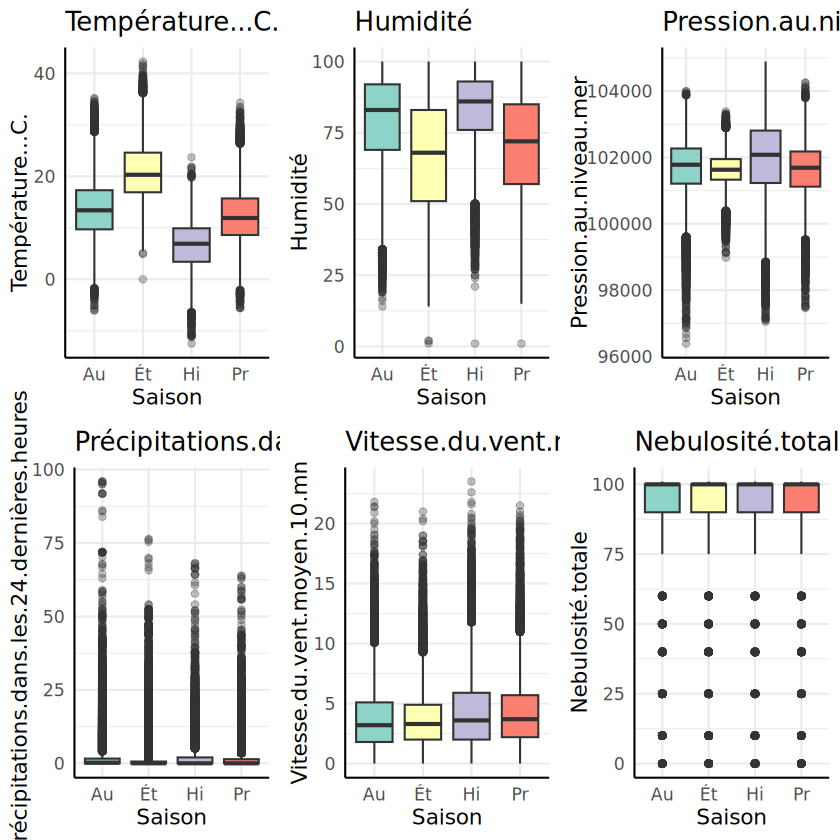

In [48]:
# library(gridExtra)

# stations_a_comparer <- c(7015, 7149, 7110, 7190, 7650, 7630)

# # Variables météo sélectionnées
# vars <- c("Température...C.", 
#           "Humidité", 
#           "Pression.au.niveau.mer", 
#           "Précipitations.dans.les.24.dernières.heures", 
#           "Vitesse.du.vent.moyen.10.mn", 
#           "Nebulosité.totale")

# Générer une liste de plots
plots <- lapply(vars, function(v) {
  plot_boxplot_by_season(data, 
                             stations = stations_a_comparer, 
                             variable = v)
})

# Afficher en grille 3x2
grid.arrange(grobs = plots, ncol = 3, nrow = 2)


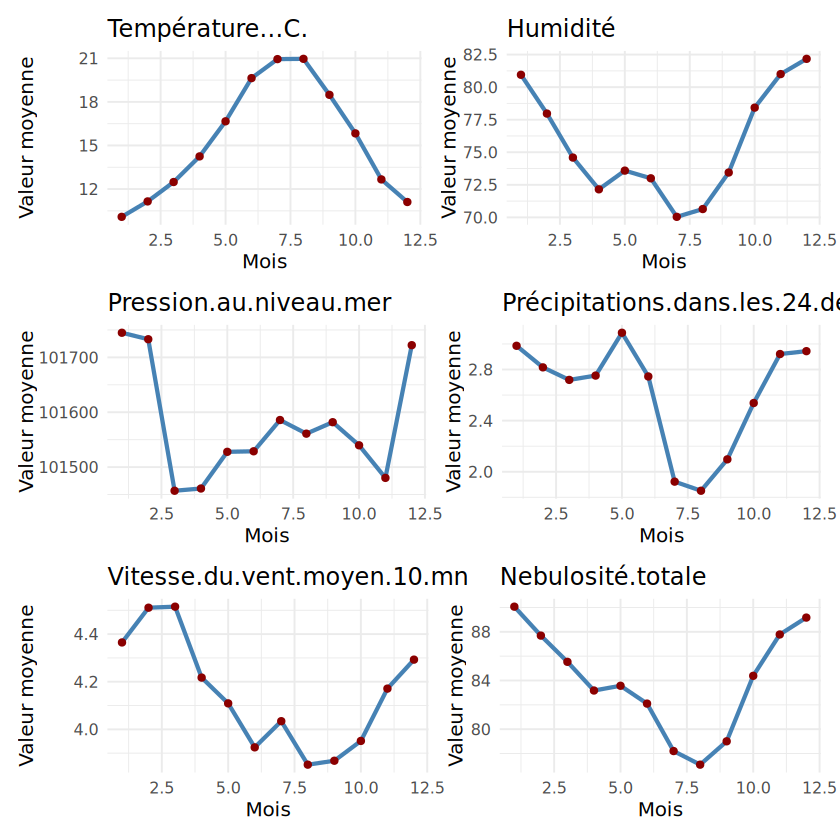

In [ ]:
# Charger les librairies
# library(dplyr)
# library(ggplot2)



# library(dplyr)
# library(ggplot2)
# install.packages("patchwork")
# library(patchwork)

# Variables sélectionnées
vars <- c("Température...C.", 
          "Humidité", 
          "Pression.au.niveau.mer", 
          "Précipitations.dans.les.24.dernières.heures", 
          "Vitesse.du.vent.moyen.10.mn", 
          "Nebulosité.totale")

# Générer une liste de graphiques
plots <- lapply(vars, function(v) {
  data %>%
    group_by(mois_de_l_annee) %>%
    summarise(val_moy = mean(.data[[v]], na.rm = TRUE)) %>%
    ggplot(aes(x = mois_de_l_annee, y = val_moy)) +
    geom_line(color = "steelblue", size = 1.2) +
    geom_point(color = "darkred") +
    theme_minimal(base_size = 12) +
    labs(title = paste( v),
         x = "Mois",
         y = "Valeur moyenne")
})

# ⚡ Organiser les 6 graphiques en grille 3 lignes x 2 colonnes
(plots[[1]] | plots[[2]]) / 
(plots[[3]] | plots[[4]]) / 
(plots[[5]] | plots[[6]])


In [ ]:
# Variables sélectionnées
vars <- c("Température...C.", 
          "Humidité", 
          "Pression.au.niveau.mer", 
          "Précipitations.dans.les.24.dernières.heures", 
          "Vitesse.du.vent.moyen.10.mn", 
          "Nebulosité.totale")

# Générer une liste de graphiques
plots <- lapply(vars, function(v) {
  data %>%
    group_by(mois_de_l_annee) %>%
    summarise(val_moy = mean(.data[[v]], na.rm = TRUE)) %>%
    ggplot(aes(x = mois_de_l_annee, y = val_moy)) +
    geom_line(color = "steelblue", size = 1.2) +
    geom_point(color = "darkred") +
    theme_minimal(base_size = 12) +
    labs(title = paste( v),
         x = "Mois",
         y = "Valeur moyenne")
})

# ⚡ Organiser les 6 graphiques en grille 3 lignes x 2 colonnes
(plots[[1]] | plots[[2]]) / 
(plots[[3]] | plots[[4]]) / 
(plots[[5]] | plots[[6]])


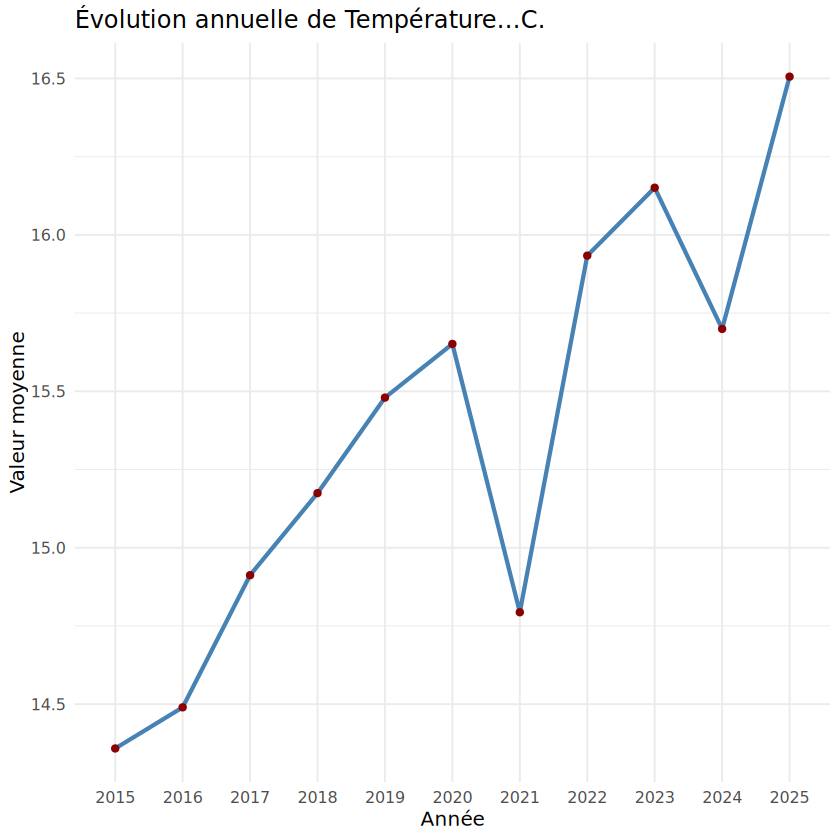

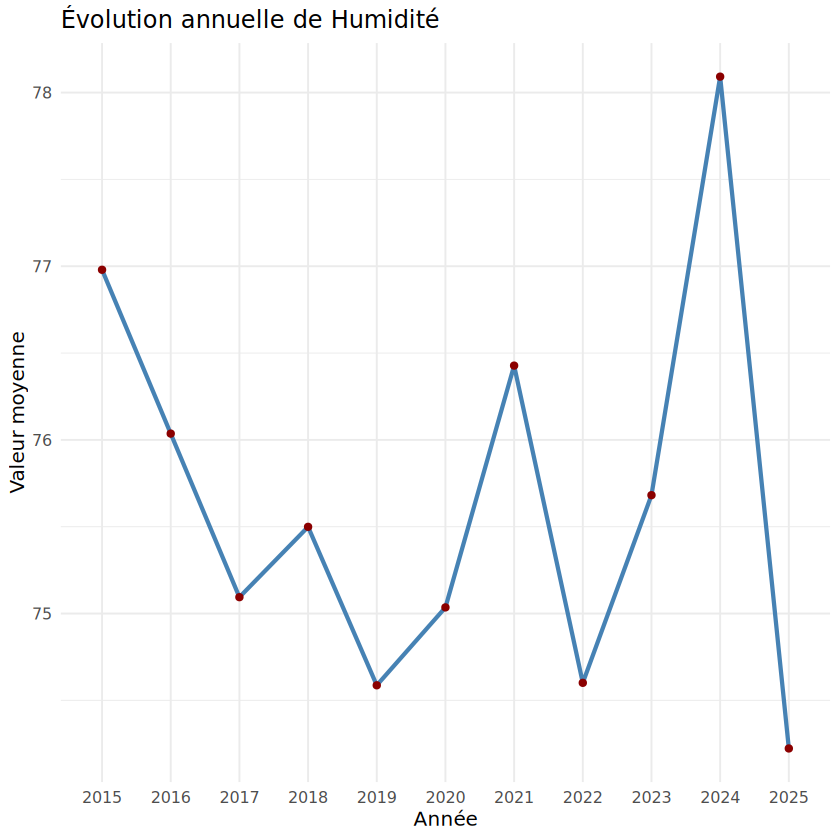

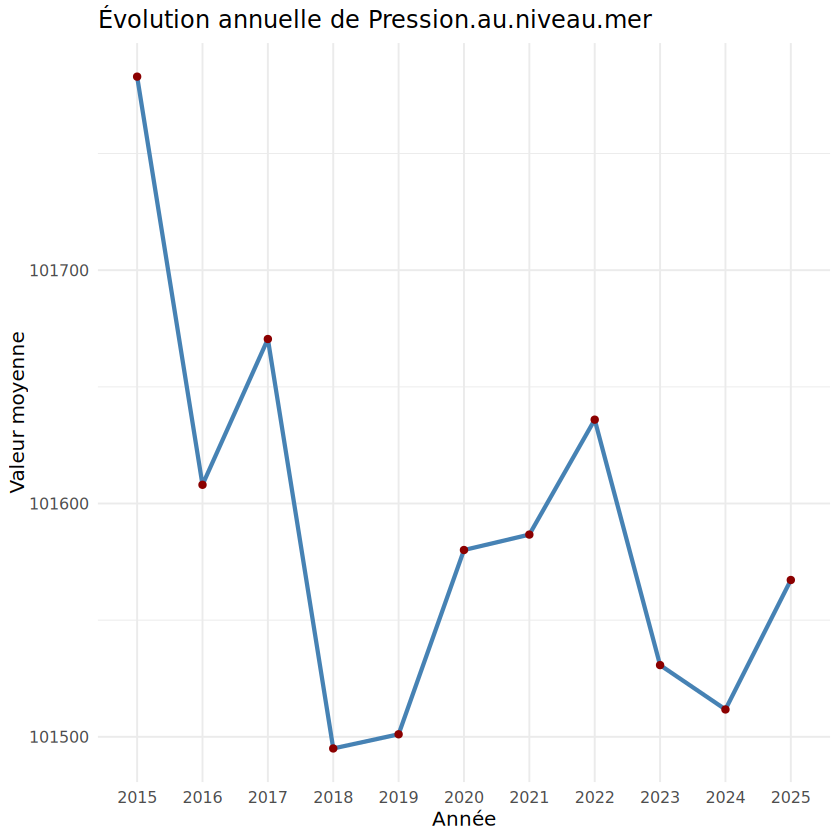

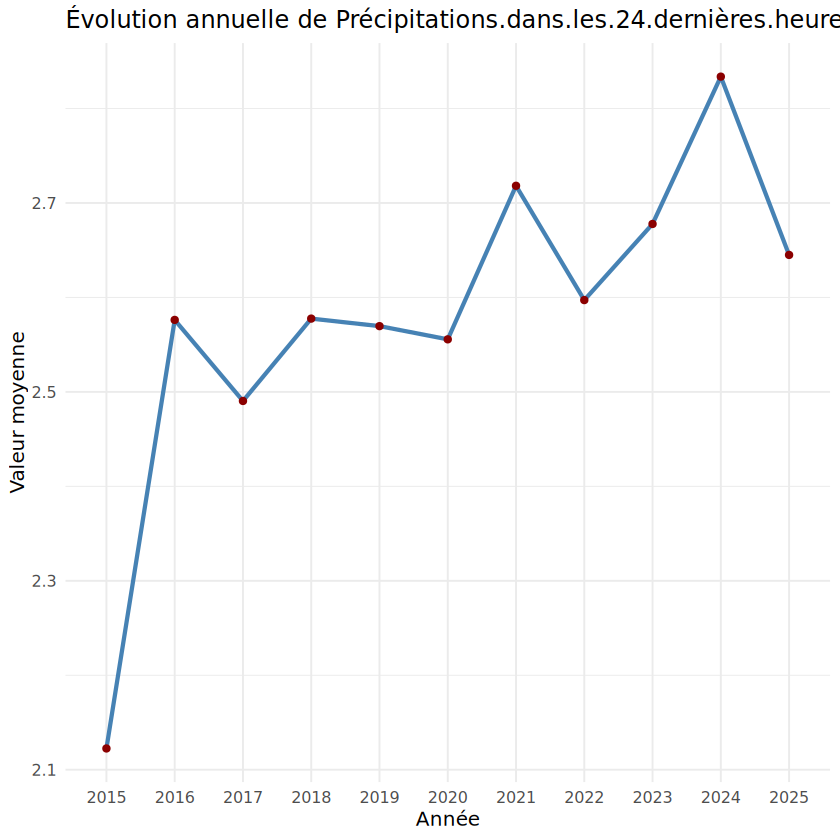

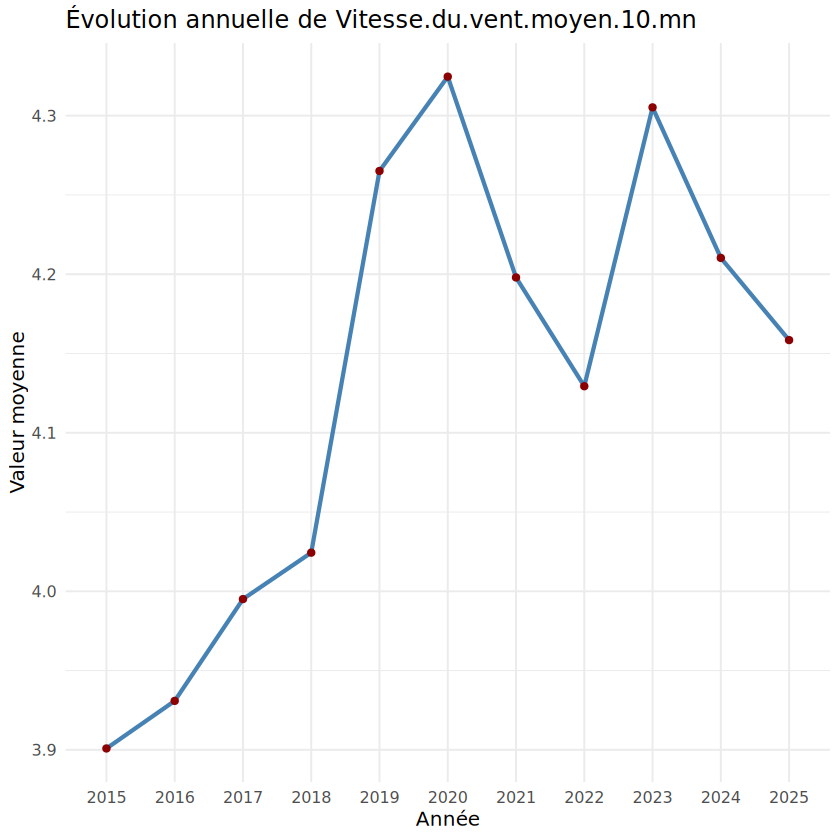

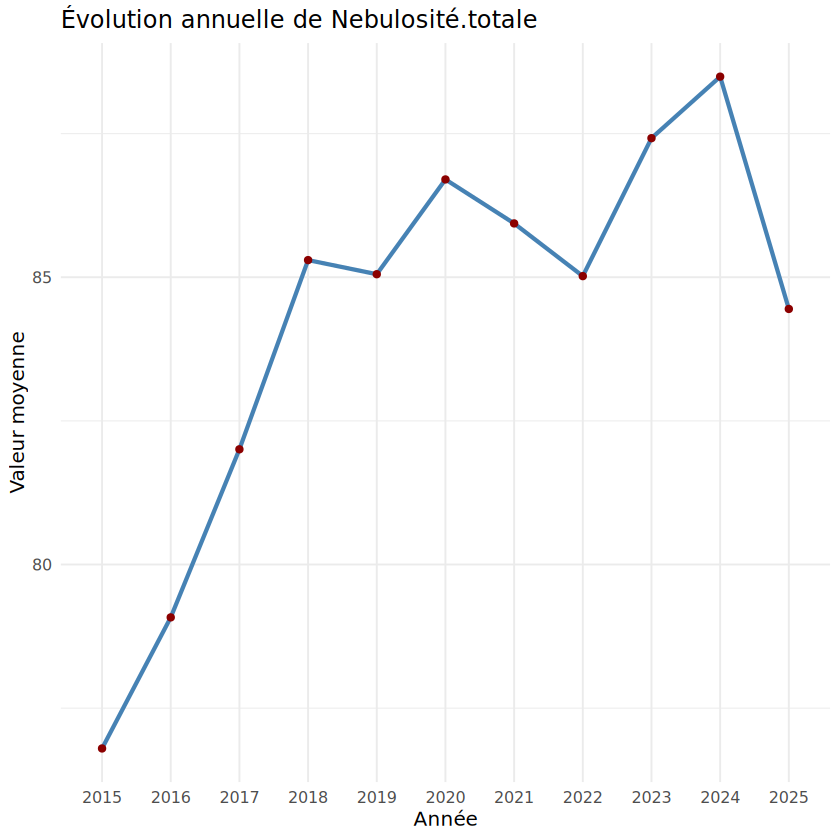

In [ ]:
# library(dplyr)
# library(ggplot2)
# library(patchwork)

# # Variables sélectionnées
# vars <- c("Température...C.", 
#           "Humidité", 
#           "Pression.au.niveau.mer", 
#           "Précipitations.dans.les.24.dernières.heures", 
#           "Vitesse.du.vent.moyen.10.mn", 
#           "Nebulosité.totale")


# # Générer une liste de graphiques par années
# plots <- lapply(vars, function(v) {
#   data %>%
#     mutate(Annee = format(Date, "%Y")) %>%
#     group_by(Annee) %>%
#     summarise(val_moy = mean(.data[[v]], na.rm = TRUE)) %>%
#     ggplot(aes(x = Annee, y = val_moy, group = 1)) +
#     geom_line(color = "steelblue", size = 1.2) +
#     geom_point(color = "darkred") +
#     theme_minimal(base_size = 12) +
#     labs(title = paste("Évolution annuelle de", v),
#          x = "Année",
#          y = "Valeur moyenne")
# })

# ⚡ Organiser les 6 graphiques en grille 3 lignes x 2 colonnes
(plots[[1]])   
(plots[[2]]) 
(plots[[3]]) 
(plots[[4]])  
(plots[[5]]) 
(plots[[6]])



## Regression
### Température vs Humidité
